### Analysis for Wristband Project

Aug/14/2023


## Import Dependency

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

Load Data into an Array List

For reference, the csv is a 21 extended object given by
['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'Instruction', 'Signal_Time', 'Batch_time','X','Y']

In [48]:
# subject name to get data path

subject_name = "Hokin"
data_path = "data/" + subject_name
section_numbers = 4

open_data = []
close_data = []
rest_data = []

for i in range (section_numbers):
    section_path = data_path + "/Section_Number_" + str(i)
    open_df = pd.read_csv(section_path + "/open.csv")
    open_data.append(open_df.values)
    close_df = pd.read_csv(section_path + "/close.csv")
    close_data.append(close_df.values)
    rest_df = pd.read_csv(section_path + "/rest.csv")
    rest_data.append(rest_df.values)

Checking if everything makes sense at this point

In [28]:
print(len(rest_data))

4


In [30]:
print(type(open_data))

<class 'list'>


In [31]:
print(np.shape(open_data[2]))

(2000, 21)


In [32]:
print(np.shape(rest_data[1]))

(18024, 21)


Combine all the things together

In [45]:
all_list = [open_data, close_data, rest_data]

Check if things are working:

In [47]:
print(len(all_list))

3


## Visualize Raw Data

Here, we visualize all the data all at once.

For reference, instruction = 0 open, = 1 close, = 2 rest

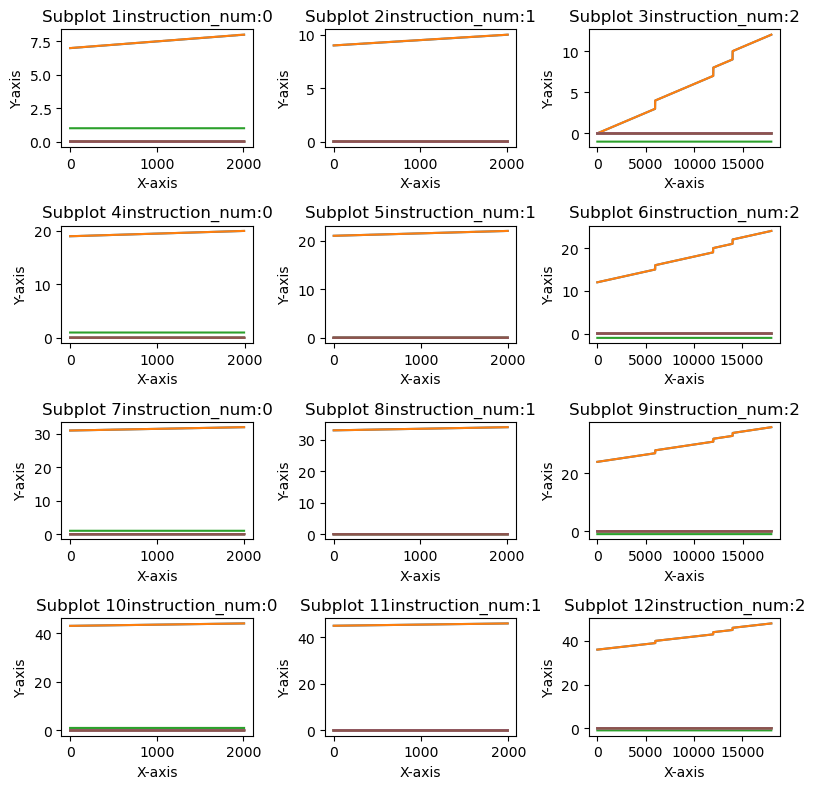

In [63]:
# Create a figure and an array of subplots
fig, axes = plt.subplots(nrows=section_numbers, ncols=3, figsize=(8, 8))

# fig is the figure object
# axes is an enumerator object that goes through each sub-figure.

i = 0
# we use section number to indicate section
for section_num, row in enumerate(axes):
    # we use instruction to indicate open, close or rest.
    for instruction_num, ax in enumerate(row):
        i = i + 1
        # get the particular section data
        plot_data = all_list[instruction_num][section_num]
        # initialize x-axis with exactly length of the data
        x = np.arange(0, len(plot_data[:,0]))
        # plot every channels
        for line_number in range(16):
            ax.plot(x, plot_data[:,line_number])
        ax.set_title(f'Subplot {i}' + 'instruction_num:' + str(instruction_num))
        ax.set_xlabel('X-axis')
        ax.set_ylabel('Y-axis')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with all subplots
plt.show()

Seems quite weird, further analysis at a section data

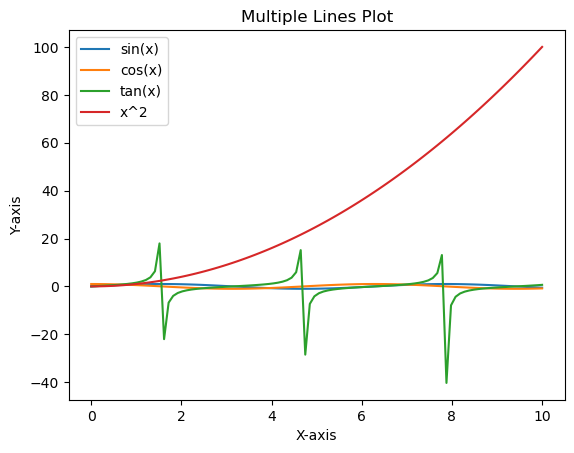

In [33]:
this_data = all_list[1][2]

